<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/CNN_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

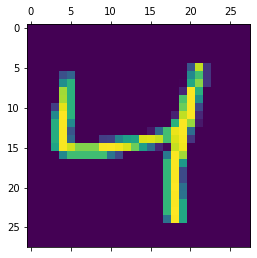

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train_flatten_shape=X_train.reshape(len(X_train),28*28)




In [14]:
X_test_flatten_shape=X_test.reshape(len(X_test),28*28)

In [15]:
X_test_flatten_shape.shape

(10000, 784)

In [27]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )


In [28]:
model.fit(X_train_flatten_shape,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8780 - accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0780 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6898 - accuracy: 0.8832
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5678 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3653 - accuracy: 0.8867


In [29]:
model.evaluate(X_test_flatten_shape,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.1891 - accuracy: 0.8875


[6.1891045570373535, 0.887499988079071]

In [30]:
y_predicted=model.predict(X_test_flatten_shape)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([0.0000000e+00, 0.0000000e+00, 1.8483115e-16, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

3

In [37]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:7]

[3, 1, 1, 0, 4, 1, 4]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 976    0    0    2    1    0    0    0    1    0]
 [   2 1127    3    0    1    2    0    0    0    0]
 [ 102  297  614    6   10    1    2    0    0    0]
 [ 116  156  260  474    2    2    0    0    0    0]
 [  42   43   54   69  771    0    1    1    1    0]
 [ 141   52   52  428   72  147    0    0    0    0]
 [ 136   22  344   15   88  182  171    0    0    0]
 [  49   81  148  614   55   64    0   17    0    0]
 [  33  190  152  306   42  194   10    3   44    0]
 [  23   51    8  381  474   31    0   38    2    1]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'truth')

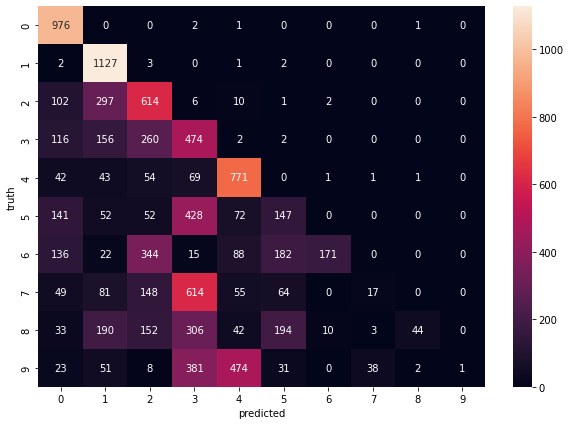

In [39]:
import seaborn as ns
plt.figure(figsize=(10,7))
ns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [40]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )


In [41]:
model.fit(X_train_flatten_shape,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5195 - accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.9035
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2978 - accuracy: 0.9267
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2493 - accuracy: 0.9358
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2247 - accuracy: 0.9424


Text(69.0, 0.5, 'truth')

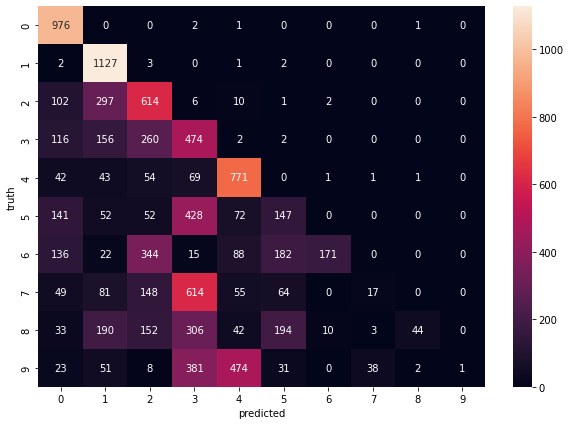

In [42]:
import seaborn as ns
plt.figure(figsize=(10,7))
ns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')